# [Applied Statistics](https://lamastex.github.io/scalable-data-science/as/2019/)
## 1MS926, Spring 2019, Uppsala University 
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 08. Pseudo-Random Numbers, Simulating from Some Discrete and Continuous Random Variables


- The $Uniform(0,1)$ RV
- The $Bernoulli(\theta)$ RV
- Simulating from the $Bernoulli(\theta)$ RV
- The Equi-Probable $de\,Moivre(k)$ RV
- Simulating from the Equi-Probable $de\,Moivre(k)$ RV
- The $Uniform(\theta_1, \theta_2)$ RV
- Simulating from the $Uniform(\theta_1, \theta_2)$ RV
- The $Exponential(\lambda)$ RV
- Simulating from the $Exponential(\lambda)$ RV
- The standard $Cauchy$ RV
- Simulating from the standard $Cauchy$ RV
- Investigating running means
- Replicable samples
- A simple simulation
 

In the last notebook, we started to look at how we can produce realisations from the most elementary $Uniform(0,1)$ random variable.

i.e., how can we produce samples $(x_1, x_2, \ldots, x_n)$ from $X_1, X_2, \ldots, X_n$ $\overset{IID}{\thicksim}$ $Uniform(0,1)$?

What is SageMath doing when we ask for random()?

In [1]:
random()

0.5591018937766103

We looked at how Modular arithmetic and number theory gives us pseudo-random number generators.

We used linear congruential generators (LCG) as simple pseudo-random number generators.

Remember that "pseudo-random" means that the numbers are not really random.  We saw that some linear congruential generators (LCG) have much shorter, more predictable, patterns than others and we learned what makes a good LCG.

We introduced the pseudo-random number generator (PRNG) called the Mersenne Twister that we will use for simulation purposes in this course.  It is based on more sophisticated theory than that of LCG but the basic principles of recurrence relations are the same. 

# The $Uniform(0,1)$ Random Variable

Recall that the $Uniform(0,1)$ random variable is the fundamental model as we can transform it to any other random variable, random vector or random structure.  The PDF $f$ and DF $F$ of $X \sim Uniform(0,1)$ are:

$f(x) = \begin{cases} 0 & \text{if} \ x \notin [0,1] \\ 1 & \text{if} \ x \in [0,1] \end{cases}$

$F(x) = \begin{cases} 0 & \text{if} \ x < 0 \\ 1 & \text{if} \ x > 1 \\ x  & \text{if} \ x \in [0,1] \end{cases}$

We use the Mersenne twister pseudo-random number generator to mimic independent and identically distributed draws from the $uniform(0,1)$ RV. 

In Sage, we use the python random module to generate pseudo-random numbers for us.  (We have already used it:  remember randint?)

random() will give us one simulation from the $Uniform(0,1)$ RV:

In [2]:
random()

0.007274233701127675

If we want a whole simulated sample we can use a list comprehension.   We will be using this technique frequently so make sure you understand what is going on.   "for i in range(3)" is acting like a counter to give us 3 simulated values in the list we are making

In [3]:
[random() for i in range(3)]

[0.3408847233058817, 0.8587016230608236, 0.8378194094849022]

In [4]:
listOfUniformSamples = [random() for i in range(3) ]
listOfUniformSamples

[0.8234771986201781, 0.9585776440188299, 0.00843205550936077]

If we do this again, we will get a different sample:

In [5]:
listOfUniformSamples2 = [random() for i in range(3) ]
listOfUniformSamples2

[0.8079994334187869, 0.8027018477545375, 0.9740375781823488]

Often is it useful to be able to replicate the same random sample.   For example, if we were writing some code to do some simulations using samples from a PRNG, and we "improved" the way that we were doing it, how would we want to test our improvement?  If we could replicate the same samples then we could show that our new code was equivalent to our old code, just more efficient.  

Remember when we were using the LCGs, and we could set the seed $x_0$?  More sophisticated PRNGs like the Mersenne Twister also have a seed.  By setting this seed to a specified value we can make sure that we can replicate samples. 

In [6]:
?set_random_seed

In [7]:
set_random_seed(256526)

In [8]:
listOfUniformSamples = [random() for i in range(3) ]
listOfUniformSamples

[0.6409693377860118, 0.9433546579659949, 0.5147129803356773]

In [9]:
initial_seed()

256526L

Now we can replicate the same sample again by setting the seed to the same value:

In [10]:
set_random_seed(256526)
listOfUniformSamples2 = [random() for i in range(3) ]
listOfUniformSamples2

[0.6409693377860118, 0.9433546579659949, 0.5147129803356773]

In [11]:
initial_seed()

256526L

In [12]:
set_random_seed(2676676766)
listOfUniformSamples2 = [random() for i in range(3) ]
listOfUniformSamples2

[0.31709291282858576, 0.47750941216422715, 0.24185704293897292]

In [13]:
initial_seed()

2676676766L

We can compare some samples visually by plotting them:

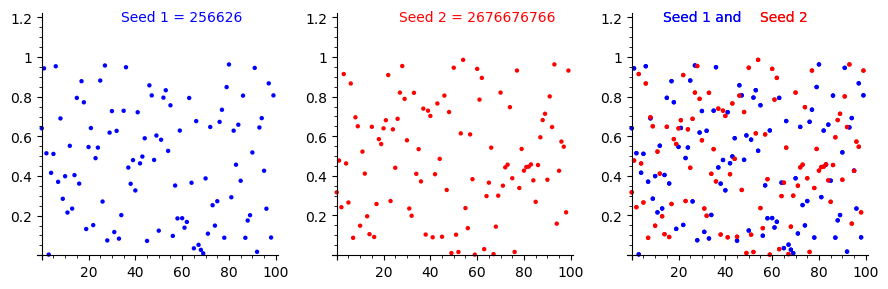

In [14]:
set_random_seed(256526)
listOfUniformSamples = [(i,random()) for i in range(100)]
plotsSeed1 = points(listOfUniformSamples)
t1 = text('Seed 1 = 256626', (60,1.2), rgbcolor='blue',fontsize=10) 
set_random_seed(2676676766)
plotsSeed2 = points([(i,random()) for i in range(100)],rgbcolor="red")
t2 = text('Seed 2 = 2676676766', (60,1.2), rgbcolor='red',fontsize=10) 
bothSeeds = plotsSeed1 + plotsSeed2
t31 = text('Seed 1 and', (30,1.2), rgbcolor='blue',fontsize=10) 
t32 = text('Seed 2', (65,1.2), rgbcolor='red',fontsize=10)
show(graphics_array( (plotsSeed1+t1,plotsSeed2+t2, bothSeeds+t31+t32)),figsize=[9,3])

### YouTry

Try looking at the more advanced documentation and play a bit.

In [15]:
#?sage.misc.randstate

(end of You Try)

---

---

### Question:

What can we do with samples from a $Uniform(0,1)$ RV?  Why bother?

### Answer:

We can use them to sample or simulate from other, more complex, random variables. 

 

# The $Bernoulli(\theta)$ Random Variable

The $Bernoulli(\theta)$ RV $X$ with PMF $f(x;\theta)$ and DF $F(x;\theta)$ parameterised by some real $\theta\in [0,1]$ is a discrete random variable with only two possible outcomes. 

$f(x;\theta)= \theta^x (1-\theta)^{1-x} \mathbf{1}_{\{0,1\}}(x) =
\begin{cases}
\theta & \text{if} \ x=1,\\
1-\theta & \text{if} \ x=0,\\
0 & \text{otherwise}
\end{cases}$

$F(x;\theta) =
\begin{cases}
1 & \text{if} \ 1 \leq x,\\
1-\theta & \text{if} \ 0 \leq x < 1,\\
0 & \text{otherwise}
\end{cases}$

Here are some functions for the PMF and DF for a $Bernoulli$ RV along with various useful functions for us in the sequel. Let's take a quick look at them.

In [16]:
def bernoulliPMF(x, theta):
    '''Probability mass function for Bernoulli(theta).
    
    Param x is the value to find the Bernoulli probability mass of.
    Param theta is the theta parameterising this Bernoulli RV.'''
    
    retValue = 0
    if x == 1:
        retValue = theta
    elif x == 0:
        retValue = 1 - theta
    return retValue
    
def bernoulliCDF(x, theta):
    '''DF for Bernoulli(theta).
    
    Param x is the value to find the Bernoulli cumulative density function of.
    Param theta is the theta parameterising this Bernoulli RV.'''
    
    retValue = 0
    if x >= 1:
        retValue = 1
    elif x >= 0:
        retValue = 1 - theta
    # in the case where x < 0, retValue is the default of 0
    return retValue

# PFM plot
def pmfPlot(outcomes, pmf_values):
    '''Returns a pmf plot for a discrete distribution.'''
    
    pmf = points(zip(outcomes,pmf_values), rgbcolor="blue", pointsize='20')
    for i in range(len(outcomes)):
        pmf += line([(outcomes[i], 0),(outcomes[i], pmf_values[i])], rgbcolor="blue", linestyle=":")
    # padding
    pmf += point((0,1), rgbcolor="black", pointsize="0")
    return pmf

# CDF plot
def cdfPlot(outcomes, cdf_values):
    '''Returns a DF plot for a discrete distribution.'''
    
    cdf_pairs = zip(outcomes, cdf_values)
    cdf = point(cdf_pairs, rgbcolor = "red", faceted = false, pointsize="20")
    for k in range(len(cdf_pairs)):
        x, kheight = cdf_pairs[k]     # unpack tuple
        previous_x = 0
        previous_height = 0
        if k > 0:
            previous_x, previous_height = cdf_pairs[k-1] # unpack previous tuple
            cdf += line([(previous_x, previous_height),(x, previous_height)], rgbcolor="grey")
            cdf += points((x, previous_height),rgbcolor = "white", faceted = true, pointsize="20")
            cdf += line([(x, previous_height),(x, kheight)], rgbcolor="blue", linestyle=":")
        
    # padding
    max_index = len(outcomes)-1
    cdf += line([(outcomes[0]-0.2, 0),(outcomes[0], 0)], rgbcolor="grey")
    cdf += line([(outcomes[max_index],cdf_values[max_index]),(outcomes[max_index]+0.2, cdf_values[max_index])], rgbcolor="grey")
    return cdf
    
def makeFreqDictHidden(myDataList):
    '''Make a frequency mapping out of a list of data.
    
    Param myDataList, a list of data.
    Return a dictionary mapping each data value from min to max in steps of 1 to its frequency count.'''
    
    freqDict = {}             # start with an empty dictionary
    sortedMyDataList = sorted(myDataList)
    for k in sortedMyDataList:
        freqDict[k] = myDataList.count(k)
    
    return freqDict # return the dictionary created

def makeEMFHidden(myDataList):
    '''Make an empirical mass function from a data list.
    
    Param myDataList, list of data to make emf from.
    Return list of tuples comprising (data value, relative frequency) ordered by data value.'''
    
    freqs = makeFreqDictHidden(myDataList)     # make the frequency counts mapping
    totalCounts = sum(freqs.values())
    relFreqs = [fr/(1.0*totalCounts) for fr in freqs.values()] # use a list comprehension
    numRelFreqPairs = zip(freqs.keys(), relFreqs) # zip the keys and relative frequencies together
    numRelFreqPairs.sort() # sort the list of tuples

    return numRelFreqPairs

from pylab import array

def makeEDFHidden(myDataList):
    '''Make an empirical distribution function from a data list.
    
    Param myDataList, list of data to make emf from.
    Return list of tuples comprising (data value, cumulative relative frequency) ordered by data value.'''
    
    freqs = makeFreqDictHidden(myDataList)     # make the frequency counts mapping
    totalCounts = sum(freqs.values())
    relFreqs = [fr/(1.0*totalCounts) for fr in freqs.values()] # use a list comprehension
    relFreqsArray = array(relFreqs)
    cumFreqs = list(relFreqsArray.cumsum())
    numCumFreqPairs = zip(freqs.keys(), cumFreqs) # zip the keys and culm relative frequencies together
    numCumFreqPairs.sort() # sort the list of tuples
    
    return numCumFreqPairs
    
# EPMF plot
def epmfPlot(samples):
    '''Returns an empirical probability mass function plot from samples data.'''
    
    epmf_pairs = makeEMFHidden(samples)
    epmf = point(epmf_pairs, rgbcolor = "blue", pointsize="20")
    for k in epmf_pairs:    # for each tuple in the list
        kkey, kheight = k     # unpack tuple
        epmf += line([(kkey, 0),(kkey, kheight)], rgbcolor="blue", linestyle=":")
    # padding
    epmf += point((0,1), rgbcolor="black", pointsize="0")
    return epmf
    

# ECDF plot
def ecdfPlot(samples):
    '''Returns an empirical probability mass function plot from samples data.'''
    ecdf_pairs = makeEDFHidden(samples)
    ecdf = point(ecdf_pairs, rgbcolor = "red", faceted = false, pointsize="20")
    for k in range(len(ecdf_pairs)):
        x, kheight = ecdf_pairs[k]     # unpack tuple
        previous_x = 0
        previous_height = 0
        if k > 0:
            previous_x, previous_height = ecdf_pairs[k-1] # unpack previous tuple
            ecdf += line([(previous_x, previous_height),(x, previous_height)], rgbcolor="grey")
            ecdf += points((x, previous_height),rgbcolor = "white", faceted = true, pointsize="20")
            ecdf += line([(x, previous_height),(x, kheight)], rgbcolor="blue", linestyle=":")
    # padding
    ecdf += line([(ecdf_pairs[0][0]-0.2, 0),(ecdf_pairs[0][0], 0)], rgbcolor="grey")
    max_index = len(ecdf_pairs)-1
    ecdf += line([(ecdf_pairs[max_index][0], ecdf_pairs[max_index][1]),(ecdf_pairs[max_index][0]+0.2, ecdf_pairs[max_index][1])],rgbcolor="grey")
    return ecdf

We can see the effect of varying $\theta$ interactively:

In [17]:
@interact
def _(theta=(0.5)):
    '''Interactive function to plot the bernoulli pmf and cdf.'''
    if theta <=1 and theta >= 0:
        outcomes = (0, 1) # define the bernoulli outcomes
        print "Bernoulli (", RR(theta).n(digits=2), ") pmf and cdf"
        # pmf plot
        pmf_values = [bernoulliPMF(x, theta) for x in outcomes]
        pmf = pmfPlot(outcomes, pmf_values) # this is one of our own, hidden, functions
        # cdf plot
        cdf_values = [bernoulliCDF(x, theta) for x in outcomes]
        cdf = cdfPlot(outcomes, cdf_values) # this is one of our own, hidden, functions
        show(graphics_array([pmf, cdf]),figsize=[8,3])
    else:
        print "0 <= theta <= 1"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTQ5Yzc2Njg+IHdpdGggMSB3aWRnZXQKICB0aGV0YTogRmxvYXRTbGlkZXIodmFsdWU9MC41LCBkZXNjcmlwdGlvbj3igKY=


Don't worry about how these plots are done:  you are not expected to be able to understand all of these details now.  

Just use them to see the effect of varying $\theta$.

## Simulating a sample from the $Bernoulli(\theta)$ RV

We can simulate a sample from a $Bernoulli$ distribution by transforming input from a $Uniform(0,1)$ distribution using the floor() function in Sage.    In maths, $\lfloor x \rfloor$,  the 'floor of  $x$' is the largest integer that is smaller than or equal to $x$.  For example, $\lfloor 3.8 \rfloor = 3$.

In [18]:
z=3.8
floor(z)

3

Using floor, we can do inversion sampling from the $Bernoulli(\theta)$ RV using the the $Uniform(0,1)$ random variable that we said is the fundamental model.

We will introduce inversion sampling more formally later.  In general, inversion sampling means using the inverse of the CDF $F$, $F^{[-1]}$, to transform input from a $Uniform(0,1)$ distribution. 

To simulate from the $Bernoulli(\theta)$, we can use the following algorithm:

### Input:

- $u \thicksim Uniform(0,1)$ from a PRNG,   $\qquad \qquad \text{where, } \sim$ means "sample from"
- $\theta$, the parameter

### Output:

$x \thicksim Bernoulli(\theta)$

### Steps:

- $u \leftarrow Uniform(0,1)$
- $x \leftarrow  \lfloor u + \theta \rfloor$
- Return $x$

 We can illustrate this with SageMath:

In [19]:
theta = 0.5 # theta must be such that 0 <= theta <= 1
u = random()
x = floor(u + theta)
x

0

To make  a number of simulations, we can use list comprehensions again:

In [20]:
theta = 0.5
n = 20
randomUs = [random() for i in range(n)]
simulatedBs = [floor(u + theta) for u in randomUs]
simulatedBs

[0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

To make modular reusable code we can package up what we have done as functions. 

The function `bernoulliFInverse(u, theta)` codes the inverse of the CDF of a Bernoulli distribution parameterised by `theta`.  The function `bernoulliSample(n, theta)` uses `bernoulliFInverse(...)` in a list comprehension to simulate n samples from a Bernoulli distribution parameterised by theta, i.e., the distribution of our $Bernoulli(\theta)$ RV.

In [21]:
def bernoulliFInverse(u, theta):
    '''A function to evaluate the inverse CDF of a bernoulli.
    
    Param u is the value to evaluate the inverse CDF at.
    Param theta is the distribution parameters.
    Returns inverse CDF under theta evaluated at u'''
    
    return floor(u + theta)
    
def bernoulliSample(n, theta):
    '''A function to simulate samples from a bernoulli distribution.
    
    Param n is the number of samples to simulate.
    Param theta is the bernoulli distribution parameter.
    Returns a simulated Bernoulli sample as a list'''
    
    us = [random() for i in range(n)]
    # use bernoulliFInverse in a list comprehension
    return [bernoulliFInverse(u, theta) for u in us] 


Note that we are using a list comprehension and the built-in SageMath `random()` function to make a list of pseudo-random simulations from the $Uniform(0,1)$.  The length of the list is determined by the value of n.  Inside the body of the function we assign this list to a variable named `us` (i.e., u plural).  We then use another list comprehension to make our simulated sample.  This list comprehension works by calling our function `bernoulliFInverse(...)` and passing in values for theta together with each u in us in turn.

Let's try a small number of samples:

In [22]:
theta = 0.2
n = 10
samples = bernoulliSample(n, theta)
samples

[0, 0, 0, 1, 0, 1, 0, 0, 0, 1]

Now lets explore the effect of interactively varying n and $\theta$:

In [23]:
@interact
def _(theta=(0.5), n=(10,(0..1000))):
    '''Interactive function to plot samples from bernoulli distribution.'''
    if theta >= 0 and theta <= 1:
        print "epmf and ecdf for ", n, " samples from Bernoulli (", theta, ")"
        samples = bernoulliSample(n, theta)
        # epmf plot
        epmf = epmfPlot(samples) # this is one of our hidden functions
        # ecdf plot
        ecdf = ecdfPlot(samples)  # this is one of our hidden functions
        show(graphics_array([epmf, ecdf]),figsize=[8,3])
    else:
        print "0 <= theta <=1, n>0"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTQ5NDdkZTg+IHdpdGggMiB3aWRnZXRzCiAgdGhldGE6IEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb27igKY=


You can vary $\theta$ and $n$ on the interactive plot.  You should be able to see that as $n$ increases, the empirical plots should get closer to the theoretical $f$ and $F$. 



### YouTry

Check that you understand what `floor` is doing.  We have put some extra print statements into our demonstration of floor so that you can see what is going on in each step.  Try evaluating this cell several times so that you see what happens with different values of `u`.

In [24]:
theta = 0.5 # theta must be such that 0 <= theta <= 1
u = random()
print "u is", u
print "u + theta is", (u + theta)
print "floor(u + theta) is", floor(u + theta)

u is 0.634132126453
u + theta is 1.13413212645321
floor(u + theta) is 1


In the cell below we use floor to get 1's and 0's from the pseudo-random u's given by random().  It is effectively doing exactly the same thing as the functions above that we use to simulate a specified number of $Bernoulli(\theta)$ RVs, but the why that it is written may be easier to understand.  If `floor` is doing what we want it to, then when `n` is sufficiently large, we'd expect our proportion of `1`s to be close to `theta` (remember Kolmogorov's axiomatic motivations for probability!).  Try changing the value assigned to the variable `theta` and re-evaluting the cell to check this.  

In [25]:
theta = 0.7 # theta must be such that 0 <= theta <= 1
listFloorResults = [] # an empty list to store results in
n = 100000    # how many iterations to do
for i in range(n): # a for loop to do something n times
    u = random() # generate u
    x = floor(u + theta) # use floor
    listFloorResults.append(x) # add x to the list of results
listFloorResults.count(1)*1.0/len(listFloorResults) # proportion of 1s in the results

0.699650000000000

# The equi-probable $de~Moivre(\theta)$ Random Variable

The $de~Moivre(\theta_1,\theta_2,\ldots,\theta_k)$ RV is the natural generalisation of the $Bernoulli (\theta)$ RV to more than two outcomes.  Take a die (i.e. one of a pair of dice): there are 6 possible outcomes from tossing a die if the die is a normal six-sided one (the outcome is which face is the on the top).  To start with we can allow the possibility that the different faces could be loaded so that they have different probabilities of being the face on the top if we throw the die.  In this case, k=6 and the parameters $\theta_1$, $\theta_2$, ...$\theta_6$ specify how the die is loaded, and the number on the upper-most face if the die is tossed is a $de\,Moivre$ random variable parameterised by $\theta_1,\theta_2,\ldots,\theta_6$. 

If $\theta_1=\theta_2=\ldots=\theta_6= \frac{1}{6}$ then we have a fair die.

Here are some functions for the equi-probable $de\, Moivre$ PMF and CDF where we code the possible outcomes as the numbers on the faces of a k-sided die, i.e, 1,2,...k.

In [26]:
def deMoivrePMF(x, k):
    '''Probability mass function for equi-probable de Moivre(k).
    
    Param x is the value to evaluate the deMoirve pmf at.
    Param k is the k parameter for an equi-probable deMoivre.
    Returns the evaluation of the deMoivre(k) pmf at x.'''
    
    if (int(x)==x) & (x > 0) & (x <= k):
        return 1.0/k
    else:
        return 0
    
def deMoivreCDF(x, k):
    '''DF for equi-probable de Moivre(k).
    
    Param x is the value to evaluate the deMoirve cdf at.
    Param k is the k parameter for an equi-probable deMoivre.
    Returns the evaluation of the deMoivre(k) cdf at x.'''
    
    return 1.0*x/k

In [27]:
@interact
def _(k=(6)):
    '''Interactive function to plot the de Moivre pmf and cdf.'''
    if (int(k) == k) and (k >= 1):
        outcomes = range(1,k+1,1) # define the outcomes
        pmf_values = [deMoivrePMF(x, k) for x in outcomes]
        print "equi-probable de Moivre (", k, ") pmf and cdf"
        # pmf plot
        pmf = pmfPlot(outcomes, pmf_values) # this is one of our hidden functions
        
        # cdf plot
        cdf_values = [deMoivreCDF(x, k) for x in outcomes]
        cdf = cdfPlot(outcomes, cdf_values) # this is one of our hidden functions
        
        show(graphics_array([pmf, cdf]),figsize=[8,3])
    else:
        print "k must be an integer, k>0"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTNhNDEyYTg+IHdpdGggMSB3aWRnZXQKICBrOiBJbnRTbGlkZXIodmFsdWU9NiwgZGVzY3JpcHRpb249dSdrJywgbWHigKY=


### YouTry
Try changing the value of k in the above interact.

## Simulating a sample from the equi-probable $de\,Moivre(k)$ random variable

We use floor ($\lfloor \, \rfloor$) again for simulating from the equi-probable $de \, Moivre(k)$ RV, but because we are defining our outcomes as 1, 2, ... k, we just add 1 to the result.  

In [28]:
k = 6
u = random()
x = floor(u*k)+1
x

2

To simulate from the equi-probable $de\,Moivre(k)$, we can use the following algorithm:

#### Input:

- $u \thicksim Uniform(0,1)$ from a PRNG
- $k$, the parameter

#### Output:

- $x \thicksim \text{equi-probable } de \, Moivre(k)$

#### Steps:

- $u \leftarrow Uniform(0,1)$
- $x \leftarrow \lfloor uk \rfloor + 1$
- return $x$

We can illustrate this with SageMath:

In [29]:
def deMoivreFInverse(u, k):
    '''A function to evaluate the inverse CDF of an equi-probable de Moivre.
    
    Param u is the value to evaluate the inverse CDF at.
    Param k is the distribution parameter.
    Returns the inverse CDF for a de Moivre(k) distribution evaluated at u.'''
    
    return floor(k*u) + 1

def deMoivreSample(n, k):
    '''A function to simulate samples from an equi-probable de Moivre.
    
    Param n is the number of samples to simulate.
    Param k is the bernoulli distribution parameter.
    Returns a simulated sample of size n from an equi-probable de Moivre(k) distribution as a list.'''
    
    us = [random() for i in range(n)]
    
    return [deMoivreFInverse(u, k) for u in us]

A small sample:

In [30]:
deMoivreSample(15,6)

[6, 3, 3, 5, 3, 1, 6, 5, 3, 4, 1, 4, 5, 2, 2]

You should understand the `deMoivreFInverse` and `deMoivreSample` functions and be able to write something like them if you were asked to. 

You are not expected to be to make the interactive plots below (but this is not too hard to do by syntactic mimicry and google searches!). 

Now let's do some interactive sampling where you can vary $k$ and the sample size $n$:

In [31]:
@interact
def _(k=(6), n=(10,(0..500))):
    '''Interactive function to plot samples from equi-probable de Moivre distribution.'''
    if n > 0 and k >= 0 and int(k) == k:
        print "epmf and ecdf for ", n, " samples from equi-probable de Moivre (", k, ")"
        outcomes = range(1,k+1,1) # define the outcomes
        samples = deMoivreSample(n, k) # get the samples
        epmf = epmfPlot(samples) # this is one of our hidden functions
        
        ecdf = ecdfPlot(samples) # this is one of our hidden functions
        
        show(graphics_array([epmf, ecdf]),figsize=[10,3])
    else:
        print "k>0 must be an integer, n>0"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTQxMmY4NDg+IHdpdGggMiB3aWRnZXRzCiAgazogSW50U2xpZGVyKHZhbHVlPTYsIGRlc2NyaXB0aW9uPXUnaycsIG3igKY=


Try changing $n$ and/or $k$.  With $k = 40$ for example, you could be simulating the number on the first ball for $n$ Lotto draws.

### YouTry

A useful counterpart to the floor of a number is the ceiling, denoted $\lceil \, \rceil$.  In maths, $\lceil x \rceil$,  the 'ceiling of  $x$' is the smallest integer that is larger than or equal to $x$.  For example, $\lceil 3.8 \rceil = 4$.  We can use the ceil function to do this in Sage:

In [32]:
ceil(3.8)

4

Try using `ceil` to check that you understand what it is doing.  What would `ceil(0)` be?  

# Inversion Sampler for Continuous Random Variables

When we simulated from the discrete RVs above, the $Bernoulli(\theta)$ and the equi-probable $de\,Moivre(k)$, we transformed some $u \thicksim Uniform(0,1)$ into some value for the RV.  

Now we will look at the formal idea of an inversion sampler for continuous random variables.  Inversion sampling for continuous random variables is a way to simulate values for a continuous random variable $X$ using $u \thicksim Uniform(0,1)$. 

The idea of the inversion sampler is to treat $u \thicksim Uniform(0,1)$ as some value taken by the CDF $F$ and find the value $x$ at which $F(X \le x) = u$.

To find x where $F(X \le x) = u$ we need to use the inverse of $F$, $F^{[-1]}$.  This is why it is called an **inversion sampler**.

Formalising this,

### Proposition

Let $F(x) := \int_{- \infty}^{x} f(y) \,d y : \mathbb{R} \rightarrow [0,1]$ be a continuous DF with density $f$, and let its inverse $F^{[-1]} $ be:

$$ F^{[-1]}(u) := \inf \{ x : F(x) = u \}  : [0,1] \rightarrow \mathbb{R} $$

Then, $F^{[-1]}(U)$ has the distribution function $F$, provided $U \thicksim Uniform(0,1)$ ($U$ is a $Uniform(0,1)$ RV).

Note:

The infimum of a set A of real numbers, denoted by $\inf(A)$, is the greatest lower bound of every element of $A$.

Proof

The "one-line proof" of the proposition is due to the following equalities: 

$$P(F^{[-1]}(U) \leq x) = P(\inf \{ y : F(y) = U)\} \leq x ) = P(U \leq F(x)) = F(x), \quad \text{for all } x \in \mathbb{R} . $$

# Algorithm for Inversion Sampler

#### Input:

- A PRNG for $Uniform(0,1)$ samples
- A procedure to give us $F^{[-1]}(u)$, inverse of the DF of the target RV $X$ evaluated at $u$

#### Output:

- A sample $x$ from $X$ distributed according to $F$

#### Algorithm steps:

- Draw $u \sim Uniform(0,1)$
- Calculate $x = F^{[-1]}(u)$

# The $Uniform(\theta_1, \theta_2)$RV

We have already met the$Uniform(\theta_1, \theta_2)$ RV.

Given two real parameters $\theta_1,\theta_2 \in \mathbb{R}$, such that $\theta_1 < \theta_2$, the PDF of the $Uniform(\theta_1,\theta_2)$ RV $X$ is:

$$f(x;\theta_1,\theta_2) =
\begin{cases}
\frac{1}{\theta_2 - \theta_1} & \text{if }\theta_1 \leq x \leq \theta_2\text{,}\\
0 & \text{otherwise}
\end{cases}
$$

and its DF given by $F(x;\theta_1,\theta_2) = \int_{- \infty}^x f(y; \theta_1,\theta_2) \, dy$ is:

$$
F(x; \theta_1,\theta_2) =
\begin{cases}
0 & \text{if }x < \theta_1 \\
\frac{x-\theta_1}{\theta_2-\theta_1} & \text{if}~\theta_1 \leq x \leq \theta_2,\\
1 & \text{if} x > \theta_2 
\end{cases}
$$

For example, here are the PDF, CDF and inverse CDF for the $Uniform(-1,1)$:

<img src="images/UniformMinus11ThreeCharts.png" width=800>

As usual, we can make some SageMath functions for the PDF and CDF:

In [33]:
# uniform pdf
def uniformPDF(x, theta1, theta2):
    '''Uniform(theta1, theta2) pdf function f(x; theta1, theta2).
    
    x is the value to evaluate the pdf at.
    theta1, theta2 are the distribution parameters.'''
    
    retvalue = 0 # default return value
    if x >= theta1 and x <= theta2:
        retvalue = 1.0/(theta2-theta1)
    return retvalue

# uniform cdf        
def uniformCDF(x, theta1, theta2):
    '''Uniform(theta1, theta2) CDF or DF function F(x; theta1, theta2).
    
    x is the value to evaluate the cdf at.
    theta1, theta2 are the distribution parameters.'''
    
    retvalue = 0 # default return value
    if (x > theta2):
        retvalue = 1
    elif (x > theta1): # else-if
        retvalue =  (x - theta1) / (theta2-theta1)   
    # if (x < theta1), retvalue will be 0
    return retvalue

Using these functions in an interactive plot, we can see the effect of changing the distribution parameters $\theta_1$ and $\theta_2$.

In [34]:
@interact
def InteractiveUniformPDFCDFPlots(theta1=0,theta2=1):
    if theta2 > theta1:
        print "Uniform(", + RR(theta1).n(digits=2), ",", RR(theta2).n(digits=2), ") pdf and cdf"
        p1 = line([(theta1-1,0), (theta1,0)], rgbcolor='blue')
        p1 += line([(theta1,1/(theta2-theta1)), (theta2,1/(theta2-theta1))], rgbcolor='blue')
        p1 += line([(theta2,0), (theta2+1,0)], rgbcolor='blue')
        
        p2 = line([(theta1-1,0), (theta1,0)], rgbcolor='red')
        p2 += line([(theta1,0), (theta2,1)], rgbcolor='red')
        p2 += line([(theta2,1), (theta2+1,1)], rgbcolor='red')
        show(graphics_array([p1, p2]),figsize=[8,3])
    else:
        print "theta2 must be greater than theta1"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIEludGVyYWN0aXZlVW5pZm9ybVBERkNERlBsb3RzIGF0IDB4N2Y5Zjk0MWRkNDEwPiB3aXRoIDIgd2lkZ2V0cwogIHRoZXRhMTogSW50U2zigKY=


# Simulating from the $Uniform(\theta_1, \theta_2)$ RV

We can simulate from the $Uniform(\theta_1,\theta_2)$ using the inversion sampler, provided that we can get an expression for $F^{[-1]}$ that can be implemented as a procedure. 

We can get this by solving for $x$ in terms of $u=F(x;\theta_1,\theta_2)$:

$$
u = \frac{x-\theta_1}{\theta_2-\theta_1} \quad \iff  \quad x = (\theta_2-\theta_1)u+\theta_1 \quad  \iff \quad  F^{[-1]}(u;\theta_1,\theta_2) = \theta_1+(\theta_2-\theta_1)u 
$$

<img src="images/Week7InverseUniformSampler.png" width=600>

## Algorithm for Inversion Sampler for the $Uniform(\theta_1, \theta_2)$ RV

#### Input:

- $u \thicksim Uniform(0,1)$
- $F^{[-1]}(u)$
- $\theta_1$, $\theta_2$

#### Output:

- A sample $x \thicksim Uniform(\theta_1, \theta_2)$

#### Algorithm steps:

- Draw $u \sim Uniform(0,1)$
- Calculate $x = F^{[-1]}(u) = (\theta_1 + u(\theta_2 - \theta_1))$
- Return $x$

We can illustrate this with SageMath by writing a function to calculate the inverse of the CDF of a uniform distribution parameterised by theta1 and theta2.  Given a value between 0 and 1 for the parameter u, it returns the height of the inverse CDF at this point, i.e. the value in the range theta1 to theta2 where the CDF evaluates to u.


In [35]:
def uniformFInverse(u, theta1, theta2):
    '''A function to evaluate the inverse CDF of a uniform(theta1, theta2) distribution.
    
    u, u should be 0 <= u <= 1, is the value to evaluate the inverse CDF at.
    theta1, theta2, theta2 > theta1, are the uniform distribution parameters.'''
    
    return theta1 + (theta2 - theta1)*u

This function transforms a single $u$ into a single simulated value from the $Uniform(\theta_1, \theta_2)$, for example:

In [36]:
u = random()
theta1, theta2 = 3, 6
uniformFInverse(u, theta1, theta2)

3.000185740410118

Then we can use this function inside another function to generate a number of samples:

In [37]:
def uniformSample(n, theta1, theta2):
    '''A function to simulate samples from a uniform distribution.
    
    n > 0 is the number of samples to simulate.
    theta1, theta2 (theta2 > theta1) are the uniform distribution parameters.'''
    
    us = [random() for i in range(n)]
    
    return [uniformFInverse(u, theta1, theta2) for u in us]

The basic strategy is the same as for simulating $Bernoulli$ and $de \, Moirve$ samples:  we are using a list comprehension and the built-in SAGE random() function to make a list of pseudo-random simulations from the $Uniform(0,1)$.  The length of the list is determined by the value of n.  Inside the body of the function we assign this list to a variable named us (i.e., u plural).  We then use another list comprehension to make our simulated sample.  This list comprehension works by calling our function uniformFInverse(...) and passing in values for theta1 and theta2 together with each u in us in turn.

You should be able to write simple functions like uniformFinverse and uniformSample yourself.

Try this for a small sample:

In [38]:
param1 = -5
param2 = 5
nToGenerate = 30
myUniformSample = uniformSample(nToGenerate, param1, param2)
print(myUniformSample)

[2.8957510482187026, 0.03128423174056394, 2.5419773139045034, 4.587000660522651, 3.017723728004537, 0.05305196079818053, 3.5570768970634745, 3.098468698217623, -4.156826181220163, 3.8334293816113494, 0.11277226038258892, 3.678064489253778, -2.49096599755666, -4.9393678427190055, -0.7536381266056988, 0.4943773601439805, 4.152171454112787, -3.176695740118023, -1.6627741539117071, 2.411177478936607, -3.6743958858960735, 4.2637761390893605, -3.3123332132398167, 1.1147343318388945, 0.857106205419214, -4.408559113596703, 1.5718140253264865, 3.6437636999952563, -4.768100573981843, 0.22751787199277906]


Much more fun, we can make an interactive plot which uses the uniformSample(...) function to generate and plot while you choose the parameters and number to generate (you are not expected to be able to make interactive plots like this):

In [39]:
@interact
def _(theta1=-1, theta2=1, n=(1..5000)):
    '''Interactive function to plot samples from uniform distribution.'''
    if theta2 > theta1:
        if n == 1:
            print n, "uniform(", + RR(theta1).n(digits=2), ",", RR(theta2).n(digits=2), ") sample"
        else:
            print n, "uniform(", + RR(theta1).n(digits=2), ",", RR(theta2).n(digits=2), ") samples"   
        sample = uniformSample(n, theta1, theta2)
        pts = zip(range(1,n+1,1),sample) # plot so that first sample is at x=1
        p=points(pts)
        p+= text(str(theta1), (0, theta1), fontsize=10, color='black') # add labels manually
        p+= text(str(theta2), (0, theta2), fontsize=10, color='black')
        p.show(xmin=0, xmax = n+1, ymin=theta1, ymax = theta2, axes=false, gridlines=[[0,n+1],[theta1,theta2]], figsize=[7,3])
                
    else:
        print "Theta1 must be less than theta2"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOWI0MDM3NTg+IHdpdGggMyB3aWRnZXRzCiAgdGhldGExOiBJbnRTbGlkZXIodmFsdWU9LTEsIGRlc2NyaXB0aW9uPXXigKY=


We can get a better idea of the distribution of our sample using a histogram (the minimum sample size has been set to 50 here because the automatic histogram generation does not do a very good job with small samples).

In [40]:
import pylab
@interact
def _(theta1=0, theta2=1, n=(50..5000), Bins=5):
    '''Interactive function to plot samples from uniform distribution as a histogram.'''
    if theta2 > theta1:
        sample = uniformSample(n, theta1, theta2)
        pylab.clf() # clear current figure
        n, bins, patches = pylab.hist(sample, Bins, density=true) 
        pylab.ylabel('normalised count')
        pylab.title('Normalised histogram')
        pylab.savefig('myHist') # to actually display the figure
        pylab.show()
    else:
        print "Theta1 must be less than theta2"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTQ5NDc5Mzg+IHdpdGggNCB3aWRnZXRzCiAgdGhldGExOiBJbnRTbGlkZXIodmFsdWU9MCwgZGVzY3JpcHRpb249dSfigKY=


# The $Exponential(\lambda)$ Random Variable

For a given $\lambda$ > 0, an $Exponential(\lambda)$ Random Variable has the following PDF $f$ and DF $F$:

 

$$
f(x;\lambda) =\begin{cases}\lambda e^{-\lambda x} & \text{if }x \ge 0\text{,}\\ 0 & \text{otherwise}\end{cases}
$$

$$
F(x;\lambda) =\begin{cases}1 - e^{-\lambda x} & \text{if }x \ge 0\text{,}\\ 0 & \text{otherwise}\end{cases}
$$

An exponential distribution is useful because is can often be used to model inter-arrival times or making inter-event measurements (if you are familiar with the $Poisson$ distribution, a discrete distribution, you may have also met the $Exponential$ distribution as the time between $Poisson$ events).  Here are some examples of random variables which are sometimes modelled with an exponential distribution:

time between the arrival of buses at a bus-stop
distance between roadkills on a stretch of highway
In SageMath, the we can use `exp(x)` to calculate $e^x$, for example:

In [41]:
x = 3.0
exp(x)

20.0855369231877

We can code some functions for the PDF and DF of an $Exponential$ parameterised by lambda like this $\lambda$.   

**Note** that we cannot or should not use the name `lambda` for the parameter because in SageMath (and Python), the term `lambda` has a special meaning. Do you recall lambda expressions?

In [42]:
def exponentialPDF(x, lam):
    '''Exponential pdf function.
    
    x is the value we want to evaluate the pdf at.
    lam is the exponential distribution parameter.'''
    
    return lam*exp(-lam*x)
    
def exponentialCDF(x, lam):
    '''Exponential cdf or df function.
    
    x is the value we want to evaluate the cdf at.
    lam is the exponential distribution parameter.'''
    
    return 1 - exp(-lam*x)

You should be able to write simple functions like `exponentialPDF` and  `exponentialCDF` yourself, but you are not expected to be able to make the interactive plots.

You can see the shapes of the PDF and CDF for different values of $\lambda$ using the interactive plot below.

In [43]:
@interact
def _(lam=('lambda',0.5),Xmax=(5..100)):
    '''Interactive function to plot the exponential pdf and cdf.'''
    if lam > 0:
        print "Exponential(", RR(lam).n(digits=2), ") pdf and cdf"
        from pylab import arange
        xvalues = list(arange(0.1, Xmax, 0.1))
        p1 = line(zip(xvalues, [exponentialPDF(y, lam) for y in xvalues]), rgbcolor='blue')
        p2 = line(zip(xvalues, [exponentialCDF(y, lam) for y in xvalues]), rgbcolor='red')
        show(graphics_array([p1, p2]),figsize=[8,3])
 
    else:
        print "Lambda must be greater than 0"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOWI0MDM5Mzg+IHdpdGggMiB3aWRnZXRzCiAgbGFtOiBGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXXigKY=


We are going to write some functions to help us to do inversion sampling from the $Exponential(\lambda)$ RV.

As before, we need an expression for $F^{[-1]}$ that can be implemented as a procedure.

We can get this by solving for $x$ in terms of $u=F(x;\lambda)$


### YouTry later

Show that

$$
F^{[-1]}(u;\lambda) =\frac{-1}{\lambda} \ln(1-u)
$$

$\ln = \log_e$ is the natural logarthim.

(end of You try)

---

---
 



# Simulating from the $Exponential(\lambda)$ RV

Algorithm for Inversion Sampler for the $Exponential(\lambda)$ RV

#### Input:

- $u \thicksim Uniform(0,1)$
- $F^{[-1]}(u)$
- $\lambda$

### Output:

- sample $x \thicksim Exponential(\lambda)$

#### Algorithm steps:

- Draw $u \sim Uniform(0,1)$
- Calculate $x = F^{[-1]}(u) = \frac{-1}{\lambda}\ln(1-u)$
- Return $x$

The function `exponentialFInverse(u, lam)` codes the inverse of the CDF of an exponential distribution parameterised by `lam`.  Given a value between 0 and 1 for the parameter `u`, it returns the height of the inverse CDF of the exponential distribution at this point, i.e. the value where the CDF evaluates to `u`.  The function `exponentialSample(n, lam)` uses `exponentialFInverse(...)` to simulate `n` samples from an exponential distribution parameterised by `lam`.  

In [44]:
def exponentialFInverse(u, lam):
    '''A function to evaluate the inverse CDF of a exponential distribution.
    
    u is the value to evaluate the inverse CDF at.
    lam is the exponential distribution parameter.'''
    
    # log without a base is the natural logarithm
    return (-1.0/lam)*log(1 - u)
    
def exponentialSample(n, lam):
    '''A function to simulate samples from an exponential distribution.
    
    n is the number of samples to simulate.
    lam is the exponential distribution parameter.'''
    
    us = [random() for i in range(n)]
    
    return [exponentialFInverse(u, lam) for u in us]

We can have a look at a small sample:

In [45]:
lam = 0.5
nToGenerate = 30
sample = exponentialSample(nToGenerate, lam)
print(sorted(sample)) # recall that sorted makes a new sorted list

[0.0125113588205858, 0.0446106177884152, 0.168104035485009, 0.197652284327824, 0.223456265784130, 0.230155647487195, 0.289451334866385, 0.330234991767644, 0.524450122724420, 0.615868006331397, 0.855682886147430, 0.861598562693223, 0.899938425232603, 1.12601683541338, 1.18879810930181, 1.50404136083550, 1.67626340919313, 1.80407870498492, 1.85186057920650, 1.92968601068065, 2.05984179746552, 2.35359507332389, 4.17665957500900, 4.20066826966049, 4.53052080151337, 4.69313988593758, 5.17968272452207, 5.42884373902885, 8.84366900758729, 17.0836471409921]


You should be able to write simple functions like `exponentialFinverse` and `exponentialSample` yourself by now.

The best way to visualise the results is to use a histogram.  With this interactive plot you can explore the effect of varying lambda and n:

In [46]:
import pylab
@interact
def _(lam=('lambda',0.5), n=(50,(10..10000)), Bins=(5,(1,1000))):
    '''Interactive function to plot samples from exponential distribution.'''
    if lam > 0:
        pylab.clf() # clear current figure
        n, bins, patches = pylab.hist(exponentialSample(n, lam), Bins, normed=true) 
        pylab.ylabel('normalised count')
        pylab.title('Normalised histogram')
        pylab.savefig('myHist') # to actually display the figure
        pylab.show()


    else:
        print "Lambda must be greater than 0"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTQ5NDdkNzA+IHdpdGggMyB3aWRnZXRzCiAgbGFtOiBGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXXigKY=


# The Standard $Cauchy$ Random Variable

A standard $Cauchy$ Random Variable has the following PDF $f$ and DF $F$:

$$
f(x) =\frac{1}{\pi(1+x^2)}\text{,}\,\, -\infty < x < \infty
$$

$$
F(x) = \frac{1}{\pi}\tan^{-1}(x) + 0.5
$$

 

The $Cauchy$ distribution is an interesting distribution because the expectation does not exist:

$$
\int \left|x\right|\,dF(x) = \frac{2}{\pi} \int_0^{\infty} \frac{x}{1+x^2}\,dx = \left(x \tan^{-1}(x) \right]_0^{\infty} - \int_0^{\infty} \tan^{-1}(x)\, dx = \infty \ .
$$

In SageMath, we can use the `arctan` function for $tan^{-1}$, and `pi` for $\pi$ and code some functions for the PDF and DF of the standard Cauchy as follows.

In [47]:
def cauchyPDF(x):
    '''Standard Cauchy pdf function.
    
    x is the value to evaluate the pdf at.'''
    
    return 1.0/(pi.n()*(1+x^2))
    
def cauchyCDF(x):
    '''Standard Cauchy cdf function.
    
    x is the value to evaluate the cdf at.'''
    
    return (1.0/pi.n())*arctan(x) + 0.5


You can see the shapes of the PDF and CDF using the plot below.  Note from the PDF $f$ above is defined for $-\infty < x < \infty$.  This means we should set some arbitrary limits on the minimum and maximum values to use for the x-axis on the plots.  You can change these limits interactively.

In [48]:
@interact
def _(lower=(-4), upper=(4)):
    '''Interactive function to plot the Cauchy pdf and cdf.'''
    if lower < upper:
        print "Standard Cauchy pdf and cdf" 
        p1 = plot(cauchyPDF, lower,upper, rgbcolor='blue')
        p2 = plot(cauchyCDF, lower,upper, rgbcolor='red')
        show(graphics_array([p1, p2]),figsize=[8,3])
    else:
        print "Upper must be greater than lower"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTQxMmZlNjA+IHdpdGggMiB3aWRnZXRzCiAgbG93ZXI6IEludFNsaWRlcih2YWx1ZT0tNCwgZGVzY3JpcHRpb249dSfigKY=


#### Constructing a standard $Cauchy$ RVs

- Place a double light sabre (i.e., one that can shoot its lazer beam from both ends, like that of Darth Mole in Star Wars) on a cartesian axis so that it is centred on $(0, 1)$.  
- Randomly spin it (so that its spin angle to the x-axis is $\theta \thicksim Uniform (0, 2\pi)$).  
- Let it come to rest.
- The y-coordinate of the point of intersection with the y-axis is a standard Cauchy RV.  

You can see that we are equally likely to get positive and negative values (the density function of the standard $Cauchy$ RV is symmetrical about 0) and whenever the spin angle is close to $\frac{\pi}{4}$ ($90^{\circ}$) or $\frac{3\pi}{2}$ ($270^{\circ}$), the intersections will be a long way out up or down the y-axis, i.e. very negative or very positive values.  If the light sabre is exactly parallel to the y-axis there will be no intersection:  a $Cauchy$ RV $X$ can take values $-\infty < x < \infty$

 

<img src="images/Week7CauchyLightSabre.png" width=300>

 

## Simulating from the standard $Cauchy$

We can perform inversion sampling on the $Cauchy$ RV by transforming a $Uniform(0,1)$ random variable into a $Cauchy$ random variable using the inverse CDF.

We can get this by replacing $F(x)$ by $u$ in the expression for $F(x)$:

$$
\frac{1}{\pi}tan^{-1}(x) + 0.5 = u
$$

and solving for $x$:

$$
\begin{array}{lcl} \frac{1}{\pi}tan^{-1}(x) + 0.5 = u & \iff & \frac{1}{\pi} tan^{-1}(x) = u - \frac{1}{2}\\ & \iff & tan^{-1}(x) = (u - \frac{1}{2})\pi\\ & \iff & tan(tan^{-1}(x)) = tan((u - \frac{1}{2})\pi)\\ & \iff & x = tan((u - \frac{1}{2})\pi) \end{array}
$$

## Inversion Sampler for the standard $Cauchy$ RV

#### Input:

- $u \thicksim Uniform(0,1)$
- $F^{[-1]}(u)$

#### Output:

- A sample $x \thicksim \text{standard } Cauchy$

#### Algorithm steps:

- Draw $u \sim Uniform(0,1)$
- Calculate $x = F^{[-1]}(u) = tan((u - \frac{1}{2})\pi)$
- Return $x$

The function `cauchyFInverse(u)` codes the inverse of the CDF of the standard Cauchy distribution.  Given a value between 0 and 1 for the parameter u, it returns the height of the inverse CDF of the standard $Cauchy$ at this point, i.e. the value where the CDF evaluates to u.  The function `cauchySample(n`) uses `cauchyFInverse(...)` to simulate `n` samples from a standard Cauchy distribution.

In [49]:
def cauchyFInverse(u):
    '''A function to evaluate the inverse CDF of a standard Cauchy distribution.
    
    u is the value to evaluate the inverse CDF at.'''
    
    return RR(tan(pi*(u-0.5)))
    
def cauchySample(n):
    '''A function to simulate samples from a standard Cauchy distribution.
    
    n is the number of samples to simulate.'''
    
    us = [random() for i in range(n)]
    return [cauchyFInverse(u) for u in us]

And we can visualise these simulated samples with an interactive plot:

In [50]:
@interact
def _(n=(50,(0..5000))):
    '''Interactive function to plot samples from standard Cauchy distribution.'''
    if n == 1:
        print n, "Standard Cauchy sample"
    else:
        print n, "Standard Cauchy samples"
    sample = cauchySample(n)
    pts = zip(range(1,n+1,1),sample)
    p=points(pts)
    p+= text(str(floor(min(sample))), (0, floor(min(sample))), \
             fontsize=10, color='black') # add labels manually
    p+= text(str(ceil(max(sample))), (0, ceil(max(sample))), \
             fontsize=10, color='black')
    p.show(xmin=0, xmax = n+1, ymin=floor(min(sample)), \
           ymax = ceil(max(sample)), axes=false, \
           gridlines=[[0,n+1],[floor(min(sample)),ceil(max(sample))]],\
           figsize=[7,3])

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTQxMmZmNTA+IHdpdGggMSB3aWRnZXQKICBuOiBTZWxlY3Rpb25TbGlkZXIoZGVzY3JpcHRpb249dSduJywgaW5kZXjigKY=


Notice how we can get some very extreme values  This is because of the 'thick tails' of the density function of the $Cauchy$ RV.  Think about this in relation to the  double light sabre visualisation.   We can see effect of the extreme values with a histogram visualisation as well.  The interactive plot below will only use values between lower and upper in the histogram.  Try increasing the sample size to something like 1000 and then gradually widening the limits:

In [51]:
import pylab
@interact
def _(n=(50,(0..5000)), lower=(-4), upper=(4), Bins=(5,(1,100))):
    '''Interactive function to plot samples from 
       standard Cauchy distribution.'''
    if lower < upper:
        if n == 1:
            print n, "Standard Cauchy sample"
        else:
            print n, "Standard Cauchy samples"
        sample = cauchySample(n) # the whole sample
        sampleToShow=[c for c in sample if (c >= lower and c <= upper)]
        pylab.clf() # clear current figure
        n, bins, patches = pylab.hist(sampleToShow, Bins, normed=true) 
        pylab.ylabel('normalised count')
        pylab.title('Normalised histogram, values between ' \
                    + str(floor(lower)) + ' and ' + str(ceil(upper)))
        pylab.savefig('myHist') # to actually display the figure
        pylab.show()
    else:
        print "lower must be less than upper"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTAwZGE0MTA+IHdpdGggNCB3aWRnZXRzCiAgbjogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnbicsIGluZGXigKY=


# Running means

When we introduced the $Cauchy$ distribution, we noted that the expectation of the $Cauchy$ RV does not exist.   This means that attempts to estimate the mean of a $Cauchy$ RV by looking at a sample mean will not be successful:  as you take larger and larger samples, the effect of the extreme values will still cause the sample mean to swing around wildly (we will cover estimation properly soon).  You are going to investigate the sample mean of simulated $Cauchy$ samples of steadily increasing size and show how unstable this is.   A convenient way of doing this is to look at a running mean.  We will start by working through the process of calculating some running means for the $Uniform(0,10)$, which do stabilise.  You will then do the same thing for the $Cauchy$ and be able to see the instability.

We will be using the pylab.cumsum function, so we make sure that we have it available.  We then generate a sample from the $Uniform(0,10)$

In [52]:
from pylab import cumsum
nToGenerate = 10 # sample size to generate
theta1, theta2 = 0, 10 # uniform parameters
uSample = uniformSample(nToGenerate, theta1, theta2)
print(uSample)

[5.234123372317886, 8.494432455891982, 9.693289516301245, 5.025095534949817, 6.860022865668135, 5.194665625019904, 3.236702879672173, 1.3642271829174146, 4.653495098823827, 0.5932379933902066]


We are going to treat this sample as though it is actually 10 samples of increasing size:

- sample 1 is the first element in uSample
- sample 2 contains the first 2 elements in uSample
- sample 3 contains the first 3 elements in uSample
- ...
- sample10 contains the first 10 elements in uSample

We know that a sample mean is the sum of the elements in the sample divided by the number of elements in the sample $n$:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

We can get the sum of the elements in each of our 10 samples with the cumulative sum of `uSample`. 

We use `cumsum` to get the cumulative sum.  This will be a `pylab.array` (or `numpy.arrat`) type, so we use the `list` function to turn it back into a list:

In [53]:
csUSample = list(cumsum(uSample))
print(csUSample)

[5.2341233723178862, 13.728555828209867, 23.421845344511112, 28.446940879460929, 35.306963745129067, 40.501629370148969, 43.738332249821141, 45.102559432738559, 49.756054531562384, 50.349292524952588]


What we have now is effectively a list

$$\left[\displaystyle\sum_{i=1}^1x_i, \sum_{i=1}^2x_i, \sum_{i=1}^3x_i, \ldots, \sum_{i=1}^{10}x_i\right]$$

So all we have to do is divide each element in `csUSample` by the number of elements that were summed to make it, and we have a list of running means 

$$\left[\frac{1}{1}\displaystyle\sum_{i=1}^1x_i, \frac{1}{2}\sum_{i=1}^2x_i, \frac{1}{3}\sum_{i=1}^3x_i, \ldots, \frac{1}{10}\sum_{i=1}^{10}x_i\right]$$

We can get the running sample sizes using the `range` function:

In [54]:
samplesizes = range(1, len(uSample)+1,1)
samplesizes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

And we can do the division with list comprehension:

In [55]:
uniformRunningMeans = [csUSample[i]/samplesizes[i]  for i in range(nToGenerate)]
print(uniformRunningMeans)

[5.2341233723178862, 6.8642779141049335, 7.8072817815037041, 7.1117352198652322, 7.0613927490258135, 6.7502715616914948, 6.2483331785458773, 5.6378199290923199, 5.5284505035069316, 5.0349292524952585]


We could pull all of this together into a function which produced a list of running means for sample sizes 1 to $n$.

In [56]:
def uniformRunningMeans(n, theta1, theta2):
    '''Function to give a list of n running means from uniform(theta1, theta2).
    
    n is the number of running means to generate.
    theta1, theta2 are the uniform distribution parameters.
    return a list of n running means.'''
    
    sample = uniformSample(n, theta1, theta2)
    from pylab import cumsum # we can import in the middle of code!
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [csSample[i]/samplesizes[i] for i in range(n)]

Have a look at the running means of 10 incrementally-sized samples:

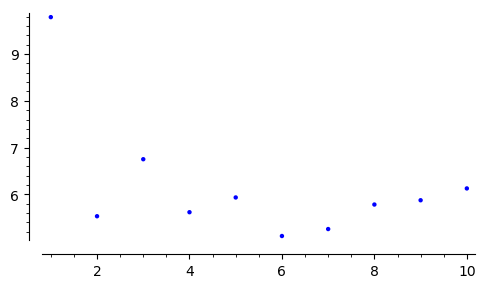

In [57]:
nToGenerate = 10
theta1, theta2 = 0, 10
uRunningMeans = uniformRunningMeans(nToGenerate, theta1, theta2)
pts = zip(range(1, len(uRunningMeans)+1,1),uRunningMeans)
p = points(pts)
show(p, figsize=[5,3])

Recall that the expectation $E_{(\theta_1, \theta_2)}(X)$ of a $X \thicksim Uniform(\theta_1, \theta_2) = \frac{(\theta_1 +\theta_2)}{2}$

In our simulations we are using $\theta_1 = 0$, $\theta_2 = 10$, so if $X \thicksim Uniform(0,10)$,  $E(X) = 5$

To show that the running means of different simulations from a $Uniform$ distribution settle down to be close to the expectation, we can plot say 5 different groups of running means for sample sizes $1, \ldots, 1000$.  We will use a line plot rather than plotting individual points. 

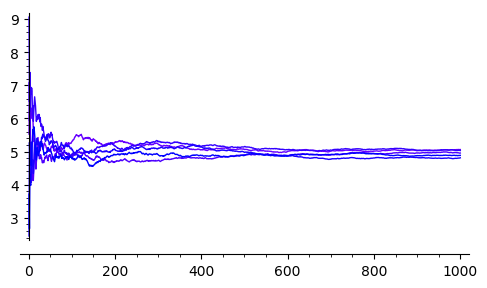

In [58]:
nToGenerate = 1000
theta1, theta2 = 0, 10
iterations = 5
xvalues = range(1, nToGenerate+1,1)
for i in range(iterations):
    redshade = 0.5*(iterations - 1 - i)/iterations # to get different colours for the lines
    uRunningMeans = uniformRunningMeans(nToGenerate, theta1, theta2)
    pts = zip(xvalues,uRunningMeans)
    if (i == 0):
        p = line(pts, rgbcolor = (redshade,0,1))
    else:
        p += line(pts, rgbcolor = (redshade,0,1))
show(p, figsize=[5,3])

### YouTry!

Your task is to now do the same thing for some standard Cauchy running means.

To start with, do not put everything into a function, just put statements into the cell(s) below to:

Make variable for the number of running means to generate; assign it a small value like 10 at this stage
Use the cauchySample function to generate the sample from the standard $Cauchy$; have a look at your sample
Make a named list of cumulative sums of your $Cauchy$ sample using list and cumsum, as we did above; have a look at your cumulative sums
Make a named list of sample sizes, as we did above
Use a list comprehension to turn the cumulative sums and sample sizes into a list of running means, as we did above
Have a look at your running means; do they make sense to you given the individual sample values?
Add more cells as you need them.

When you are happy that you are doing the right things, **write a function**, parameterised by the number of running means to do, that returns a list of running means.   Try to make your own function rather than copying and changing the one we used for the $Uniform$: you will learn more by trying to do it yourself.   Please call your function `cauchyRunningMeans`, so that (if you have done everything else right), you'll be able to use some code we will supply you with to plot the results.  

Try checking your function by using it to create a small list of running means.  Check that the function does not report an error and gives you the kind of list you expect.

When you think that your function is working correctly, try evaluating the cell below: this will put the plot of 5 groups of  $Uniform(0,10)$ running means beside a plot of 5 groups of standard $Cauchy$ running means produced by your function. 

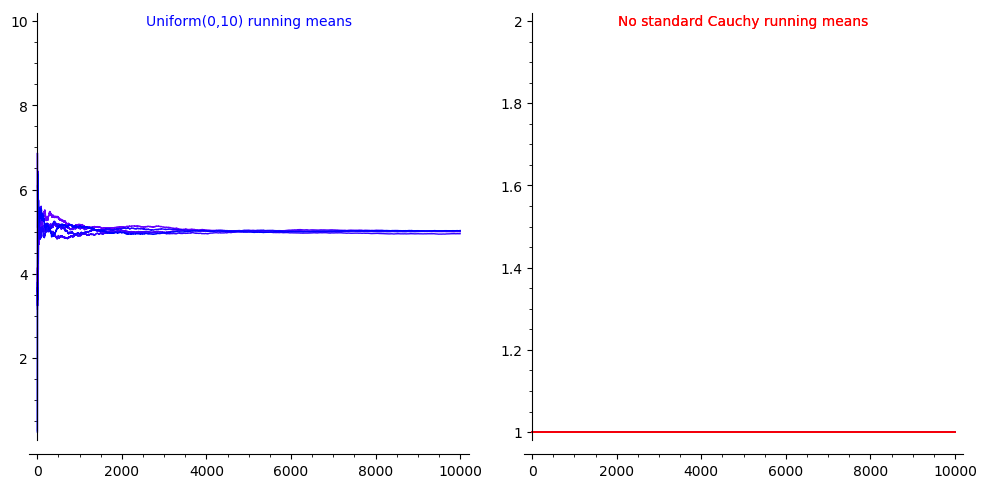

In [59]:
nToGenerate = 10000
theta1, theta2 = 0, 10
iterations = 5
xvalues = range(1, nToGenerate+1,1)
for i in range(iterations):
    shade = 0.5*(iterations - 1 - i)/iterations # to get different colours for the lines
    uRunningMeans = uniformRunningMeans(nToGenerate, theta1, theta2)
    problemStr="" # an empty string
    # use try to catch problems with cauchyRunningMeans functions
    try:
        cRunningMeans = cauchyRunningMeans(nToGenerate)
        ##cRunningMeans = hiddenCauchyRunningMeans(nToGenerate)
        cPts = zip(xvalues, cRunningMeans)
    except NameError, e:
        # cauchyRunningMeans is not defined
        cRunningMeans = [1 for c in range(nToGenerate)] # default value
        problemStr = "No " 
    except Exception, e:
        # some other problem with cauchyRunningMeans
        cRunningMeans = [1 for c in range(nToGenerate)]
        problemStr = "Problem with "      
    uPts = zip(xvalues, uRunningMeans)
    cPts = zip(xvalues, cRunningMeans)
    if (i < 1):
        p1 = line(uPts, rgbcolor = (shade, 0, 1))
        p2 = line(cPts, rgbcolor = (1-shade, 0, shade))
        cauchyTitleMax = max(cRunningMeans) # for placement of cauchy title
    else:
        p1 += line(uPts, rgbcolor = (shade, 0, 1))
        p2 += line(cPts, rgbcolor = (1-shade, 0, shade))
        if max(cRunningMeans) > cauchyTitleMax:
            cauchyTitleMax = max(cRunningMeans)
titleText1 = "Uniform(" + str(theta1) + "," + str(theta2) + ") running means" # make title text
t1 = text(titleText1, (nToGenerate/2,theta2), rgbcolor='blue',fontsize=10) 
titleText2 = problemStr + "standard Cauchy running means" # make title text
t2 = text(titleText2, (nToGenerate/2,ceil(cauchyTitleMax)+1), rgbcolor='red',fontsize=10) 
show(graphics_array((p1+t1,p2+t2)),figsize=[10,5])

# Replicable samples

Remember that we know how to set the seed of the PRNG used by `random()` with `set_random_seed`?  If we wanted our sampling functions to give repeatable samples, we could also pass the functions the seed to use.  Try making a new version of `uniformSample` which has a parameter for a value to use as the random number generator seed.   Call your new version `uniformSampleSeeded` to distinguish it from the original one. 

Try out your new `uniformSampleSeeded` function:  if you generate two samples using the same seed they should be exactly the same.  You could try using a large sample and checking on sample statistics such as the mean, min, max, variance etc, rather than comparing small samples by eye. 

Recall that you can also give parameters default values in SageMath.  Using a default value means that if no value is passed to the function for that parameter, the default value is used.  Here is an example with a very simple function:

In [60]:
# we already saw default parameters in use - here's a careful walkthrough of how it works 
def simpleDefaultExample(x, y=0):
    '''A simple function to demonstrate default parameter values.
    
    x is the first parameter, with no default value.
    y is the second parameter, defaulting to 0.'''
    
    return x + y

Note that parameters with default values need to come after parameters without default values when we define the function. 

Now you can try the function - evaluate the following cells to see what you get:

In [61]:
simpleDefaultExample (1,3) # specifying two arguments for the function

4

In [62]:
simpleDefaultExample (1) # specifying one argument for the function

1

In [63]:
# another way to specify one argument for the function
simpleDefaultExample (x=6) 

6

In [64]:
# uncomment next line and evaluate - but this will give an error because x has no default value
#simpleDefaultExample() 

In [65]:
# uncomment next line and evaluate - but this will also give an error because x has no default value
# simpleDefaultExample (y=9) 

Try making yet another version of the uniform sampler which takes a value to be used as a random number generator seed, but defaults to `None` if no value is supplied for that parameter.  `None` is a special Python type.

In [66]:
x = None
type(x)

<type 'NoneType'>

Using `set_random_seed(None)` will mean that the random seed is actually reset to a new ('random') value.  You can see this by testing what happens when you do this twice in succession and then check what seed is being used with `initial_seed`:

In [67]:
set_random_seed(None)
initial_seed()

42393473400311701202036145539200045797L

In [68]:
set_random_seed(None)
initial_seed()

76256142332635074721669854011496362336L

Do another version of the `uniformSampleSeeded` function with a default value for the seed of `None`.

Check your function again by testing with both when you supply a value for the seed and when you don't.

---
## Assignment 2, PROBLEM 4
Maximum Points = 1


First read and understand the following simple simulation (originally written by Jenny Harlow). Then you will modify the simulation to find the solution to this problem.

### A Simple Simulation

We could use the samplers we have made to do a very simple simulation.  Suppose the inter-arrival times, in minutes, of Orbiter buses at an Orbiter stop in Christchurch follows an $Exponential(\lambda = 0.1)$ distribution.  Also suppose that this is quite a popular bus stop, and the arrival of people is very predictable:  one new person will arrive in each whole minute.  This means that the longer another bus takes in coming, the more people arrive to join the queue.  Also suppose that the number of free seats available on any bus follows a $de\, Moivre(k=40)$ distribution, i.e, there are equally like to to be 1, or 2, or 3 ... or 40 spare seats.   If there are more spare seats than people in the queue, everyone can get onto the bus and  nobody is left waiting, but if there are not enough spare seats some people will be left waiting for the next bus.  As they wait, more people arrive to join the queue....

This is not very realistic - we would want a better model for how many people arrive at the stop at least, and for the number of spare seats there will be on the bus.  However, we are just using this as a simple example that you can do using the random variables you already know how to simulate samples from.

Try to code this example yourself, using our suggested steps.  We have put our version the code into a cell below, but you will get more out of this example by trying to do it yourself first.

#### Suggested steps:

- Get a list of 100 $Exponential(\lambda = 0.1)$ samples using the `exponentialSamples` function.  Assign the list to a variable named something like `busTime`s.  These are your 100 simulated bus inter-arrival times.  
- Choose a value for the number of people who will be waiting at the busstop when you start the simulation.  Call this something like `waiting`.  
- Make a list called something like `leftWaiting`, which to begin with contains just the value assigned to `waiting`. 
- Make an empty list called something like `boardBus`.   
- Start a for loop which takes each element in `busTimes` in turn, i.e. each bus inter-arrival time, and within the for loop:
  - Calculate the number of people arriving at the stop as the floor of the time taken for that bus to arrive (i.e., one person for each whole minute until the bus arrives)
  - Add this to the number of people waiting (e.g., if the number of arrivals is assigned to a variable arrivals, then waiting = waiting + arrivals will increment the value assigned to the waiting variable by the value of arrivals).
  - Simulate a value for the number of seats available on the bus as one simulation from a $de \, Moirve(k=40)$ RV (it may be easier to use `deMoivreFInverse` rather than `deMoivreSample` because you only need one value - remember that you will have to pass a simulated $u \thicksim Uniform(0,1)$ to `deMoivreFInverse` as well as the value of the parameter $k$).
  - The number of people who can get on the bus is the minimum of the number of people waiting in the queue and the number of seats on the bus.  Calculate this value and assign it to a variable called something like `getOnBus`.
  - Append `getOnBus` to the list `boardBus`.
  - Subtract `getOnBus` from the number of people waiting, waiting (e.g.,  `waiting = waiting - getOnBus` will decrement waiting by the number of people who get on the bus).
  - Append the new value of `waiting` to the list `leftWaiting`. 
- That is the end of the for loop: you now have two lists, one for the number of people waiting at the stop and one for the number of people who can board each bus as it arrives.

## YouTry


Here is our code to do the bus stop simulation. 
Yours may be different - maybe it will be better!

*You are expected to find the needed functions from the latest notebook this assignment came from and be able to answer this question. Unless you can do it in your head.*

In [69]:
def busStopSimulation(buses, lam, seats):
    '''A Simple Simulation - see description above!'''
    BusTimes = exponentialSample(buses,lam)
    waiting = 0 # how many people are waiting at the start of the simulation
    BoardBus = [] # empty list
    LeftWaiting = [waiting] # list with just waiting in it
    for time in BusTimes: # for each bus inter-arrival time
        arrivals = floor(time) # people who arrive at the stop before the bus gets there
        waiting = waiting + arrivals # add them to the queue
        busSeats = deMoivreFInverse(random(), seats) # how many seats available on the bus
        getOnBus = min(waiting, busSeats) # how many people can get on the bus
        BoardBus.append(getOnBus) # add to the list
        waiting = waiting - getOnBus # take the people who board the bus out of the queue
        LeftWaiting.append(waiting) # add to the list
    return [LeftWaiting, BoardBus, BusTimes]

In [70]:
# let's simulate the people left waiting at the bus stop
set_random_seed(None) # replace None by a integer to fix seed and output of simulation
buses = 100
lam = 0.1
seats = 40
leftWaiting, boardBus, busTimes = busStopSimulation(buses, lam, seats)

print(leftWaiting) # look at the leftWaiting list

print(boardBus) # boad bus

print(busTimes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 10, 16, 0, 0, 20, 0, 0, 0, 11, 0, 0, 0, 0, 25, 1, 0, 1, 7, 0, 11, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 22, 28, 10, 12, 16, 49, 36, 29, 11, 7, 0, 0, 0, 0, 0, 0, 1, 30, 30, 3, 0, 0, 6, 0, 23, 0, 0, 0, 0, 23, 22, 15, 0, 0, 0, 0, 13, 21, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 8, 5, 8, 12, 8, 1, 3, 19, 3, 10, 2, 5, 14, 8, 3, 1, 6, 2, 9, 1, 25, 4, 1, 26, 7, 21, 10, 12, 2, 10, 7, 9, 31, 8, 34, 1, 7, 9, 11, 1, 4, 5, 0, 7, 1, 14, 7, 0, 12, 19, 19, 20, 1, 16, 21, 30, 34, 7, 7, 0, 11, 15, 7, 1, 10, 25, 6, 32, 7, 5, 17, 7, 24, 36, 24, 8, 6, 3, 6, 9, 19, 10, 3, 4, 8, 3, 15, 9, 9, 10, 13, 1, 4, 19, 2, 1, 5, 3, 2]
[4.27327131445581, 8.00984294335955, 5.74377886599613, 8.29044002797984, 12.1847239161158, 8.25131997304757, 1.51360284807211, 3.19803273385060, 19.1184194461011, 3.64997255853884, 10.9439866230689, 6.54011204623823, 1.10668485848914, 14.5811211061700, 8.28539527637837, 3.10738603782052, 1.19076719921697, 6.99402123304893, 2.28596764

We could do an interactive visualisation of this by evaluating the next cell. This will be showing the number of people able to board the bus and the number of people left waiting at the bus stop by the height of lines on the plot.

In [71]:
@interact
def _(seed=[0,123,456], lam=[0.1,0.01], seats=[40,10,1000]):
    set_random_seed(seed)
    buses=100
    leftWaiting, boardBus, busTimes = busStopSimulation(buses, lam,seats)
    p1 = line([(0.5,0),(0.5,leftWaiting[0])])
    from pylab import cumsum
    csBusTimes=list(cumsum(busTimes))
    for i in range(1, len(leftWaiting), 1):
    
        p1+= line([(csBusTimes[i-1],0),(csBusTimes[i-1],boardBus[i-1])], rgbcolor='green')
        p1+= line([(csBusTimes[i-1]+.01,0),(csBusTimes[i-1]+.01,leftWaiting[i])], rgbcolor='red')

    t1 = text("Boarding the bus", (csBusTimes[len(busTimes)-1]/3,max(max(boardBus),max(leftWaiting))+1), \
          rgbcolor='green',fontsize=10) 
    t2 = text("Waiting", (csBusTimes[len(busTimes)-1]*(2/3),max(max(boardBus),max(leftWaiting))+1), \
          rgbcolor='red',fontsize=10)     
    xaxislabel = text("Time", (csBusTimes[len(busTimes)-1],-10),fontsize=10,color='black')
    yaxislabel = text("People", (-50,max(max(boardBus),max(leftWaiting))+1),fontsize=10,color='black')
    show(p1+t1+t2+xaxislabel+yaxislabel,figsize=[8,5])

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjlmOTQxZGQ1Nzg+IHdpdGggMyB3aWRnZXRzCiAgc2VlZDogRHJvcGRvd24oZGVzY3JpcHRpb249dSdzZWVkJywgb3B0aW/igKY=



Very briefly explain the effect of varying one of the three parameters:

- `seed`
- `lam`
- `seats`

while holding the other two parameters fixed on:

- the number of people waiting at the bus stop and
- the number of people boarding the bus 

by using the dropdown menus in the `@interact` above. Think if the simulation makes sense and explain why. You can write down your answers using keyboard by double-clicking this cell and writing between `---` and `---`.

---


---


#### Solution for CauchyRunningMeans

In [72]:
def hiddenCauchyRunningMeans(n):
    '''Function to give a list of n running means from standardCauchy.
    
    n is the number of running means to generate.'''
    
    sample = cauchySample(n)
    from pylab import cumsum
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [csSample[i]/samplesizes[i] for i in range(n)]